# 2.2 아청패널분석(2010 초4 패널)

- [1 데이터](#1-데이터)
- [2 관측 데이터 분석](#2-관측-데이터-분석)
- [3 패널 회귀분석](#3-패널-회귀분석)
- [부록: Stata 및 R의 추정 결과](#부록:-Stata-및-R의-추정-결과)

원래의 연구에서는 한국아동·청소년패널조사(KCYPS 2010)의 초1, 초4, 중1 패널 각각에 대해 다문화 배경이 학업성적에 미치는 영향을 분석했는데, 본 노트북에서는 그 중에서 **초4 패널 분석만** 살펴보기로 한다.  

>원시(raw) 데이터는 한국청소년정책연구원에서 데이터를 [다운로드](https://www.nypi.re.kr/archive/mps/program/examinDataCode/dataDwloadAgreeView?menuId=MENU00226) 받는다. 1차년도부터 7차년도까지의 데이터를 다운받아 이를 패널 데이터로 만드는 작업부터 시작해야 한다.(아래 첫 번째 명령문이 그것에 해당한다.) 

## 1 데이터

한국청소년정책연구원이 생산하는 여러 조사 데이터 중 한국아동·청소년패널조사[한국아동청소년패널조사](https://www.nypi.re.kr/archive/board?menuId=MENU00220)(KCYPS)는 아동·청소년들의 성장과 발달의 변화를 종합적으로 파악할 수 있는 패널 데이터이다. 본 연구에서 분석하는 “KCYPS 2010”은 2010년 기준 전국의 초등학교 1학년(2,342명)과 4학년(2,378명), 중학교 1학년(2,351명) 등 3개 코호트 총 7,071명의 청소년을 대상으로 2010년부터 2016년까지 7개년에 걸쳐 추적조사를 시행한 것이다.

![한국아동청소년패널조사](https://raw.githubusercontent.com/pilsunchoi/images3/main/2-3.png)

### 다문화청소년 패널 데이터 만들기

원시(raw) 데이터를 사용해 분석을 시작하기를 원하는 독자들은 한국청소년정책연구원에서 데이터를 [다운로드](https://www.nypi.re.kr/archive/mps/program/examinDataCode/dataDwloadAgreeView?menuId=MENU00226) 받아야 한다. 1차년도부터 7차년도까지의 데이터를 다운받아 이를 패널 데이터로 만드는 작업부터 시작해야 한다. 아래 명령문이 그것에 해당한다.

    import pandas as pd
    import os
    import re

    # 폴더 경로
    base_folder = r"C:\1.1 다문화\Data\KCYPS2010 e4[EXCEL]"

    # 패널 데이터를 만들기 위한 반복문
    panel_data_list = []

    for i in range(1, 8):  # 1차년도부터 7차년도까지
        file = os.path.join(base_folder, f"KCYPS2010 e4w{i}.xlsx")

        # 파일 로딩 및 변수명에서 "w{연차}" 접미사 제거
        data = pd.read_excel(file).rename(
            columns=lambda x: re.sub(f"w{i}$", "", x) #$는 문자열의 끝을 나타냄
        )
    
        # 각 연차별 데이터프레임을 리스트에 추가
        panel_data_list.append(data)

    # 모든 연차의 패널 데이터를 하나로 결합하여 "panel_data" 생성
    panel_data = pd.concat(panel_data_list)

    # 패널 데이터를 KCYPS2010 e4.csv 파일로 저장
    panel_data.to_csv("..\Data\KCYPS2010 e4[EXCEL]\KCYPS2010 e4.csv", index=False)

### KCYPS2010 초4 패널 데이터 불러들이기

**`KCYPS2010 e4.csv` 불러오기**

In [2]:
import pandas as pd

panel_data = pd.read_csv("..\Data\KCYPS2010 e4[EXCEL]\KCYPS2010 e4.csv") 
panel_data

,ID,SCLID,PANEL,WAVE,SURVEY1,SURVEY2,WEIGHT1,GENDER,PARENT,BRT1A,...,SCL1,SCL2,COEDU,INCOME1,MDA2D,FUR1A01,FUR1A02,EDU2D06,SCLTYP1,INT1E
0,15202,152.0,2,1,1,1,402.379162,2.0,1.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15203,152.0,2,1,1,1,414.563121,1.0,1.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15204,152.0,2,1,1,1,402.379162,2.0,1.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15205,152.0,2,1,1,1,414.563121,1.0,1.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15206,152.0,2,1,1,1,402.379162,2.0,1.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16641,168529,NaN,2,7,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16642,168530,1422.0,2,7,1,2,127.617004,1.0,NaN,2000.0,...,1.0,NaN,1.0,3.0,1.0,3.0,NaN,NaN,1.0,4.0
16643,168531,1428.0,2,7,1,1,119.183870,2.0,1.0,2001.0,...,1.0,NaN,2.0,3.0,1.0,3.0,3.0,NaN,1.0,2.0
16644,168532,NaN,2,7,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br></br>**데이터 유형 확인**

In [3]:
# panel_data의 변수 별 데이터 유형 확인
data_types = panel_data.dtypes

# 데이터 유형 종류 확인
unique_data_types = data_types.unique()

print("panel_data의 변수 별 데이터 유형:")
print(data_types)

print("\npanel_data에 있는 데이터 유형 종류:")
print(unique_data_types)

panel_data의 변수 별 데이터 유형:
ID           int64
SCLID      float64
PANEL        int64
WAVE         int64
SURVEY1      int64
            ...   
FUR1A01    float64
FUR1A02    float64
EDU2D06    float64
SCLTYP1    float64
INT1E      float64
Length: 1054, dtype: object

panel_data에 있는 데이터 유형 종류:
[dtype('int64') dtype('float64')]


**무응답 이상치를 결측값으로 처리**

- 무응답(-9), 이상치(-8) 등은 조사진이 결손치로 지정하였음

In [4]:
print("값이 -9인 경우의 수:", (panel_data == -9).sum().sum())
print("값이 -8인 경우의 수:", (panel_data == -8).sum().sum())

값이 -9인 경우의 수: 164706
값이 -8인 경우의 수: 11460


In [5]:
import numpy as np

# panel_data에서 값이 -9, -8 경우를 결측값으로 처리
panel_data.replace([-9, -8], np.nan, inplace=True)

In [6]:
print("값이 -9인 경우의 수:", (panel_data == -9).sum().sum())
print("값이 -8인 경우의 수:", (panel_data == -8).sum().sum())

값이 -9인 경우의 수: 0
값이 -8인 경우의 수: 0


### 설문조사 항목

* `ID` 표본 ID 
* `PANEL` 1: 초1 패널 2: 초4 패널 3: 중1 패널 
* `WAVE` 1: 1차 조사(2010년) 2: 2차 조사(2011년) 3: 3차 조사(2012년) 4: 4차 조사(2013년) 5: 5차 조사(2014년) 6: 6차 조사(2015년) 7: 7차 조사(2016년)
<br></br>
* **배경 변인**
  * 성별 `GENDER` 1 남 2 여 
  * 가구 연간 소득 `INCOME` 연소득 세후 만원
  * 다문화가정 여부 `FAM1C` 다문화 가정 : 국제결혼 가정, 외국인 노동자 가정, 새터민(탈북자) 가정, 중국 조선족 가정 등 1 다문화가정 2 비다문화가정
  * 부모 교육수준(최종학력) `HAK2A`(부) `HAK2B`(모) 1 중졸이하 2 고졸 3 전문대졸 4 대졸 5 대학원졸 6 해당사항없음(함께 살고 있지 않은 경우 “해당사항 없음”으로 응답)
  * (보호자)삶의 만족도 `PAR2` 1 매우 만족한다 2 만족하는 편이다 3 만족하지 못하는 편이다 4 전혀 만족하지 못한다
<br></br>
* **개인 발달**
  * 건강상태 평가 `PHY3A` 1 매우 건강하다 2 건강한 편이다 3 건강하지 못한 편이다 4 매우 건강하지 못하다
  * 과목별 주관적 평가 `INT1C01`-`INT1C05`(국어 수학 영어 과학 사회) 1 매우 잘 했다 2 잘한 편이다 3 보통이다 4 못한 편이다 5 매우 못했다 ** 과목별 (실제) 점수나 전체 성적 주관적 평가는 7차 조사에서만 조사됨.
  * 학원/과외 시간 `TIM2A` 학원/과외시간- 등교일 (#시간) `TIM2B` 학원/과외시간- 등교일 (#분) `TIM2C` 학원/과외시간- 비등교일 (#시간) `TIM2D` 학원/과외시간- 비등교일 (#분) 
  * 방과후교육 연간 경험 유무 `EDU5A02` 1 있다 2 없다 
  * (초1 패널) 초등 전 사교육 경험유무 `EDU4A` 1 있다 2 없다 
  * (초4 및 중1 패널) 비행 행동(연간 유무) `DLQ1A01` 담배 피우기  `DLQ1A02` 술 마시기 `DLQ1A03` 무단결석 `DLQ1A04` 가출 `DLQ1A05` 다른 사람 심하게 놀리거나 조롱하기 `DLQ1A06` 다른 사람 집단따돌림(왕따)시키기 `DLQ1A07` 패싸움 `DLQ1A08` 다른 사람 심하게 때리기 `DLQ1A09` 다른 사람 협박하기 `DLQ1A10` 다른 사람 돈이나 물건 뺏기(삥뜯기) `DLQ1A11` 다른 사람 돈이나 물건 훔치기 `DLQ1A12` 성관계 `DLQ1A13` 성폭행이나 성희롱 `DLQ1A14` 돈을 걸고 도박 게임하기 1 있다 2 없다
  * (초4 및 중1 패널) 비행 피해(연간 유무) `DLQ2A01` 심한 놀림이나 조롱당하기 `DLQ2A02` 집단따돌림(왕따)당하기 `DLQ2A03` 심하게 맞기(폭행) `DLQ2A04` 협박당하기 `DLQ2A05` 돈이나 물건 뺏기기(삥뜯기기) `DLQ2A06` 성폭행이나 성희롱 `DLQ2A07` 심한 욕설 1 있다 2 없다
<br></br>
* **발달 환경**
  * 부모의 관심 `FAM3A01` 다른 일(직장이나 바깥일)보다 나를 더 중요하게 생각하신다 `FAM3A02` 내가 학교에서 어떻게 생활하는지 관심을 갖고 물어보신다 `FAM3A03` 내 몸이나, 옷, 이불 등이 깨끗하도록 항상 신경 쓰신다 `FAM3A04` 내가 많이 아프면 적절한 치료를 받게 하신다 1 매우 그렇다 2 그런 편이다 3 그렇지 않은 편이다 4 전혀 그렇지 않다
  * 부모의 학대 `FAM3B01` 내가 무언가 잘못했을 때 정도 이상으로 심하게 혼내신다 `FAM3B02` 내가 잘못하면 무조건 때리려고 하신다 `FAM3B03` 내 몸에 멍이 들거나 상처가 남을 정도로 부모님(보호자)께서 나를 심하게 대하신 적이 많다 `FAM3B04` 나에게 심한 말이나 욕을 하신 적이 많다(예: 멍청이, 개만도 못한 것, 나가 죽어라, 네가 없어졌으면 좋겠다 등)  1 매우 그렇다 2 그런 편이다 3 그렇지 않은 편이다 4 전혀 그렇지 않다
  * 학교 학습활동 `EDU2A01` 학교 수업 시간이 재미있다 `EDU2A02` 학교 숙제를 빠뜨리지 않고 한다 `EDU2A03` 수업 시간에 배운 내용을 잘 알고 있다 1 매우 그렇다 2 그런 편이다 3 그렇지 않은 편이다 4 전혀 그렇지 않다
  * 교우관계 `EDU2C01` 우리 반 아이들과 잘 어울린다 `EDU2C02` 친구와 다투었을 때 먼저 사과한다 `EDU2C03` 친구가 교과서나 준비물을 안 가져왔을 때 함께 보거나 빌려 준다 `EDU2C04` 친구가 하는 일을 방해한다 `EDU2C05` 놀이나 모둠활동을 할 때 친구들이 내 말을 잘 따라 준다 1 매우 그렇다 2 그런 편이다 3 그렇지 않은 편이다 4 전혀 그렇지 않다
  * 교사관계 `EDU2D01` 선생님을 만나면 반갑게 인사한다 `EDU2D02` 선생님과 이야기하는 것이 편하다 `EDU2D03` 학교 밖에서 선생님을 만나면 반갑다 `EDU2D04` 우리 선생님께서는 나에게 친절하시다 1 매우 그렇다 2 그런 편이다 3 그렇지 않은 편이다 4 전혀 그렇지 않다

**성적이 8로 기록된 경우 결측값으로 처리**

In [7]:
# 특정 열 선택
columns_to_check = ['INT1C01', 'INT1C02', 'INT1C03', 'INT1C04', 'INT1C05']

# 값이 8인 경우가 몇 개인지 확인
panel_data[columns_to_check].apply(lambda x: (x == 8).sum())

INT1C01     1
INT1C02     0
INT1C03     0
INT1C04    26
INT1C05    84
dtype: int64

In [8]:
# 값이 8인 경우를 결측값으로 처리
panel_data[columns_to_check] = panel_data[columns_to_check].replace(8, np.nan)

**주관적 학업성적: `score`**

- 값이 높아질수록 잘하는 것으로 전환: 1(매우 잘했다)가 5로 바뀜

In [9]:
panel_data['score_01'] = 6 - panel_data['INT1C01'] 
panel_data['score_02'] = 6 - panel_data['INT1C02'] 
panel_data['score_03'] = 6 - panel_data['INT1C03'] 
panel_data['score_04'] = 6 - panel_data['INT1C04'] 
panel_data['score_05'] = 6 - panel_data['INT1C05'] 

**성적 변수 만들기**

In [10]:
# 각 ID 별로 score_01부터 score_05까지의 평균값 계산하여 'score'로 지정
panel_data['score'] = panel_data[
    ['score_01', 'score_02', 'score_03', 'score_04', 'score_05']].mean(axis=1)
panel_data['score'].describe()

count    12636.000000
mean         3.333376
std          0.887940
min          1.000000
25%          2.800000
50%          3.400000
75%          4.000000
max          5.000000
Name: score, dtype: float64

**WAVE 더미**

In [11]:
panel_data['wave1'] = (panel_data['WAVE'] == 1).astype(int)
panel_data['wave2'] = (panel_data['WAVE'] == 2).astype(int)
panel_data['wave3'] = (panel_data['WAVE'] == 3).astype(int)
panel_data['wave4'] = (panel_data['WAVE'] == 4).astype(int)
panel_data['wave5'] = (panel_data['WAVE'] == 5).astype(int)
panel_data['wave6'] = (panel_data['WAVE'] == 6).astype(int)
panel_data['wave7'] = (panel_data['WAVE'] == 7).astype(int)

print(panel_data[['WAVE', 'wave1']])

       WAVE  wave1
0         1      1
1         1      1
2         1      1
3         1      1
4         1      1
...     ...    ...
16641     7      0
16642     7      0
16643     7      0
16644     7      0
16645     7      0

[16646 rows x 2 columns]


**`male`**

In [12]:
# 남학생 더미
panel_data['male'] = 2 - panel_data['GENDER']

**`income`**

In [13]:
# INCOME 값을 1000으로 나누어 단위를 조정
panel_data['income'] = panel_data['INCOME'] / 1000

**다문화 더미변수: `mc`**

In [14]:
# 다문화 더미
panel_data['mcd'] = 2 - panel_data['FAM1C']
panel_data['mcd']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16641    NaN
16642    NaN
16643    0.0
16644    NaN
16645    0.0
Name: mcd, Length: 16646, dtype: float64

In [15]:
# Pivot table을 생성하여 ID별로 WAVE에 따른 mcd 값을 확인
mcd_pivot = panel_data.pivot_table(index='ID', columns='WAVE', values='mcd')

# 결과 출력
print(mcd_pivot)

WAVE      1    2    3    4    5    6    7
ID                                       
15202   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15203   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15204   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15205   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15206   0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...
168529  0.0  0.0  NaN  NaN  NaN  NaN  NaN
168530  0.0  0.0  0.0  NaN  0.0  0.0  NaN
168531  0.0  0.0  0.0  0.0  0.0  0.0  0.0
168532  0.0  0.0  0.0  0.0  0.0  NaN  NaN
168533  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[2378 rows x 7 columns]


**다문화 더미변수 보정**

- 일부 학생의 경우 WAVE에 따라 다문화 더미 변수(mcd) 값이 달라지는 경우가 있어, 이를 보정함
- panel_data에서 각 ID에 대해 전체 WAVE에 있어서 mcd 값이 동일하지 않을 경우 각 ID 별로 최빈값을 구해 전체 WAVE에 대해 동일한 값을 부여하여 mc이란 변수를 새로 만드는 작업임.
- mcd에 결측값만 있는 경우는 결측값을 반환
- mcd의 1과 0이 동일한 경우에는 1을 반환

다음은 간단한 예제 데이터를 사용해 바로 앞에서 설명한 다문화 더미변수 보정 작업이 제대로 작동할지를 미리 확인해보는 작업이다.

    ## 보정작업 예제로 코드가 제대로 실행될지를 확인함 ##

    import pandas as pd
    import numpy as np

    # 데이터 정의
    data = {
        'ID': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
        'WAVE': [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7],
        'mcd': [np.nan, np.nan, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, np.nan, np.nan,         np.nan, np.nan, np.nan]
    }
    data = pd.DataFrame(data)

    # ID별로 그룹화
    grouped = data.groupby('ID')

    # 각 ID에 대해 최빈값 계산
    result = {}
    for name, group in grouped:
        # 결측값이 아닌 데이터만 고려
        non_missing_data = group['mcd'].dropna()
        if non_missing_data.empty:
            result[name] = None  # 모든 값이 결측인 경우
        else:
            counts = non_missing_data.value_counts()
            if len(counts) > 1 and counts.iloc[0] == counts.iloc[1]:
                result[name] = 1  # 0과 1의 개수가 동일한 경우 1 선택
            else:
                result[name] = counts.idxmax()  # 가장 많이 나온 값

    # 새로운 컬럼 mc을 생성하여 ID별로 계산된 값 매핑
    data['mc'] = data['ID'].map(result)

    # 데이터프레임 출력
    data

    ******************************
    	ID	WAVE	mcd	mc
    0	1	1	NaN	1.0
    1	1	2	NaN	1.0
    2	1	3	1.0	1.0
    3	1	4	1.0	1.0
    4	1	5	1.0	1.0
    5	1	6	1.0	1.0
    6	1	7	1.0	1.0
    7	2	1	1.0	0.0
    8	2	2	1.0	0.0
    9	2	3	0.0	0.0
    10	2	4	0.0	0.0
    11	2	5	0.0	0.0
    12	2	6	0.0	0.0
    13	2	7	0.0	0.0
    14	3	1	0.0	1.0
    15	3	2	1.0	1.0
    16	3	3	NaN	1.0
    17	3	4	NaN	1.0
    18	3	5	NaN	1.0
    19	3	6	NaN	1.0
    20	3	7	NaN	1.0

**`mc` 변수**

In [16]:
# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
result = {}
for name, group in grouped:
    # 결측값이 아닌 데이터만 고려
    non_missing_data = group['mcd'].dropna()
    if non_missing_data.empty:
        result[name] = None  # 모든 값이 결측인 경우
    else:
        counts = non_missing_data.value_counts()
        if len(counts) > 1 and counts.iloc[0] == counts.iloc[1]:
            result[name] = 1  # 0과 1의 개수가 동일한 경우 1 선택
        else:
            result[name] = counts.idxmax()  # 가장 많이 나온 값

# 새로운 컬럼 mc을 생성하여 ID별로 계산된 값 매핑
panel_data['mc'] = panel_data['ID'].map(result)

# 데이터프레임 출력
panel_data['mc']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16641    0.0
16642    0.0
16643    0.0
16644    0.0
16645    0.0
Name: mc, Length: 16646, dtype: float64

In [17]:
# Pivot table을 생성하여 ID별로 WAVE에 따른 mc 값을 확인
mc_pivot = panel_data.pivot_table(index='ID', columns='WAVE', values='mc')

# 결과 출력
print(mc_pivot)

WAVE      1    2    3    4    5    6    7
ID                                       
15202   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15203   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15204   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15205   0.0  0.0  0.0  0.0  0.0  0.0  0.0
15206   0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...
168529  0.0  0.0  0.0  0.0  0.0  0.0  0.0
168530  0.0  0.0  0.0  0.0  0.0  0.0  0.0
168531  0.0  0.0  0.0  0.0  0.0  0.0  0.0
168532  0.0  0.0  0.0  0.0  0.0  0.0  0.0
168533  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[2378 rows x 7 columns]


**부모 교육수준: `fa_edu` & `mo_edu`**

In [18]:
panel_data['fa_ed'] = panel_data['HAK2A']
panel_data['mo_ed'] = panel_data['HAK2B']

**부모 학력수준이 6(해당사항없음)인 경우의 비율**

In [19]:
import pandas as pd

# 부모 학력 값이 6인 경우 비율을 계산
percentage_fa_ed_6 = (panel_data['HAK2A'] == 6).mean() * 100
percentage_mo_ed_6 = (panel_data['HAK2B'] == 6).mean() * 100

# 결과 출력
print(f"부의 학력수준이 '해당사항없음'인 경우의 비율: {percentage_fa_ed_6:.2f}%")
print(f"모의 학력수준이 '해당사항없음'인 경우의 비율: {percentage_mo_ed_6:.2f}%")

부의 학력수준이 '해당사항없음'인 경우의 비율: 0.00%
모의 학력수준이 '해당사항없음'인 경우의 비율: 0.00%


**값이 6인 경우 전체 평균값으로 대체: `fa_ed1` & `mo_ed1`**

In [20]:
# 새 변수를 생성하고, 모든 값을 기존 값으로 초기화
panel_data['fa_ed1'] = panel_data['HAK2A']
panel_data['mo_ed1'] = panel_data['HAK2B']

# 값이 6이 아닌 경우의 평균 계산
fa_ed_avg = panel_data.loc[panel_data['HAK2A'] != 6, 'HAK2A'].mean()
mo_ed_avg = panel_data.loc[panel_data['HAK2B'] != 6, 'HAK2B'].mean()

print(fa_ed_avg, mo_ed_avg)

# 값이 6인 경우를 평균값으로 대체
panel_data.loc[panel_data['fa_ed1'] == 6, 'fa_ed1'] = fa_ed_avg
panel_data.loc[panel_data['mo_ed1'] == 6, 'mo_ed1'] = mo_ed_avg

print(panel_data['fa_ed1'].mean(), panel_data['mo_ed1'].mean())

3.0971558913678807 2.8702702702702703
3.0971558913678807 2.8702702702702703


In [21]:
# Pivot table을 생성하여 ID별로 WAVE에 따른 fa_ed1 및 mo_ed1 값을 확인
fa_ed1_pivot = panel_data.pivot_table(index='ID', columns='WAVE', values='fa_ed1')
mo_ed1_pivot = panel_data.pivot_table(index='ID', columns='WAVE', values='mo_ed1')

# 결과 출력
print(fa_ed1_pivot)
print(mo_ed1_pivot)

WAVE      1    2    3    4    5    6    7
ID                                       
15202   2.0  2.0  2.0  2.0  2.0  2.0  2.0
15203   4.0  4.0  4.0  4.0  4.0  4.0  4.0
15204   3.0  4.0  4.0  4.0  4.0  4.0  4.0
15205   4.0  4.0  4.0  4.0  4.0  4.0  4.0
15206   4.0  4.0  4.0  4.0  4.0  4.0  4.0
...     ...  ...  ...  ...  ...  ...  ...
168529  3.0  NaN  NaN  NaN  NaN  NaN  NaN
168530  3.0  4.0  4.0  NaN  2.0  2.0  NaN
168531  3.0  4.0  4.0  3.0  3.0  3.0  3.0
168532  2.0  2.0  2.0  2.0  2.0  NaN  NaN
168533  4.0  2.0  2.0  2.0  2.0  2.0  2.0

[2304 rows x 7 columns]
WAVE      1    2    3    4    5    6    7
ID                                       
15202   2.0  2.0  2.0  2.0  2.0  2.0  2.0
15203   4.0  4.0  4.0  4.0  4.0  4.0  4.0
15204   2.0  4.0  4.0  4.0  4.0  4.0  4.0
15205   4.0  4.0  4.0  4.0  4.0  4.0  4.0
15206   2.0  2.0  2.0  2.0  2.0  2.0  2.0
...     ...  ...  ...  ...  ...  ...  ...
168529  2.0  2.0  NaN  NaN  NaN  NaN  NaN
168530  3.0  4.0  4.0  NaN  2.0  2.0  NaN
168531  3

**부모 교육수준이 여러 값을 갖는 경우 최빈값으로 통일: `fa_edu` & `mo_edu`**

In [22]:
import pandas as pd
import numpy as np

# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
def calculate_mode(group):
    # fa_ed1의 최빈값 계산
    mode_value = group['fa_ed1'].mode()
    if not mode_value.empty:
        return mode_value.iloc[0] # iloc[0]는 첫 번째(가장 크기가 작은) 최빈값
    else:
        return np.nan  # 모든 값이 결측인 경우 NaN 반환

# 각 ID에 대한 최빈값을 가진 시리즈 생성
fa_edu = grouped.apply(calculate_mode)

# 새로운 컬럼 fa_edu를 생성하여 ID별로 계산된 최빈값 매핑
panel_data['fa_edu'] = panel_data['ID'].map(fa_edu)

# 결과를 확인
print(panel_data[['ID', 'fa_ed1', 'fa_edu']])

           ID  fa_ed1  fa_edu
0       15202     2.0     2.0
1       15203     4.0     4.0
2       15204     3.0     4.0
3       15205     4.0     4.0
4       15206     4.0     4.0
...       ...     ...     ...
16641  168529     NaN     3.0
16642  168530     NaN     2.0
16643  168531     3.0     3.0
16644  168532     NaN     2.0
16645  168533     2.0     2.0

[16646 rows x 3 columns]


In [23]:
import pandas as pd
import numpy as np

# ID별로 그룹화
grouped = panel_data.groupby('ID')

# 각 ID에 대해 최빈값 계산
def calculate_mode(group):
    # mo_ed1의 최빈값 계산
    mode_value = group['mo_ed1'].mode()
    if not mode_value.empty:
        return mode_value.iloc[0] # iloc[0]는 첫 번째(가장 크기가 작은) 최빈값
    else:
        return np.nan  # 모든 값이 결측인 경우 NaN 반환

# 각 ID에 대한 최빈값을 가진 시리즈 생성
mo_edu = grouped.apply(calculate_mode)

# 새로운 컬럼 mo_edu를 생성하여 ID별로 계산된 최빈값 매핑
panel_data['mo_edu'] = panel_data['ID'].map(mo_edu)

# 결과를 확인하려면 다음을 출력하십시오.
print(panel_data[['ID', 'mo_ed1', 'mo_edu']])

           ID  mo_ed1  mo_edu
0       15202     2.0     2.0
1       15203     4.0     4.0
2       15204     2.0     4.0
3       15205     4.0     4.0
4       15206     2.0     2.0
...       ...     ...     ...
16641  168529     NaN     2.0
16642  168530     NaN     2.0
16643  168531     3.0     3.0
16644  168532     NaN     2.0
16645  168533     2.0     2.0

[16646 rows x 3 columns]


**보호자 삶의 만족도: `par_satis`**

- 값이 높을수록 만족도가 높은 것으로 전환: 1(1 매우 만족한다)가 4로 바뀜

In [24]:
panel_data['par_satis'] = 5 - panel_data['PAR2'] 

**`health`**

- 값이 높을수록 건강한 것으로 전환: 1(매우 건강하다)가 4로 바뀜

In [25]:
panel_data['health'] = 5 - panel_data['PHY3A'] 

**학원/과외 시간: `aft_sch`**

- 등교일과 비등교일을 2대 1의 비율로 가중평균(단위: 시간) (2*(TIM2A + TIM2B/60) + (TIM2C + TIM2D/60))/3

In [26]:
panel_data['aft_sch'] = (
    2/3 * (panel_data['TIM2A'] + panel_data['TIM2B'] / 60) + 
    1/3 * (panel_data['TIM2C'] + panel_data['TIM2D'] / 60)
) 
panel_data[['TIM2A', 'TIM2B', 'TIM2C', 'TIM2D', 'aft_sch']]

,TIM2A,TIM2B,TIM2C,TIM2D,aft_sch
0,2.0,45.0,1.0,30.0,2.333333
1,1.0,0.0,0.0,0.0,0.666667
2,1.0,0.0,0.0,0.0,0.666667
3,2.0,0.0,0.0,0.0,1.333333
4,2.0,0.0,0.0,0.0,1.333333
...,...,...,...,...,...
16641,NaN,NaN,NaN,NaN,NaN
16642,2.0,0.0,0.0,0.0,1.333333
16643,2.0,0.0,6.0,0.0,3.333333
16644,NaN,NaN,NaN,NaN,NaN


**방과후교육 경험(더미): `aft_sch1`**

In [27]:
# 방과후교육 더미
panel_data['aft_sch1'] = 2 - panel_data['EDU5A02']

**부모의 관심: `care`**

In [28]:
# 값이 높을수록 적응이 좋은 것으로 전환: 1(매우 그렇다)가 4로 바뀜
panel_data['care1'] = 5 - panel_data['FAM3A01']
panel_data['care2'] = 5 - panel_data['FAM3A02']
panel_data['care3'] = 5 - panel_data['FAM3A03']
panel_data['care4'] = 5 - panel_data['FAM3A04']

In [29]:
# 평균을 계산하여 care 열로 저장
panel_data['care'] = panel_data[['care1', 'care2', 'care3','care4']].mean(axis=1)

**부모의 학대: `abuse`**

In [30]:
# 값이 높을수록 적응이 좋은 것으로 전환: 1(매우 그렇다)가 4로 바뀜
panel_data['abuse1'] = 5 - panel_data['FAM3B01']
panel_data['abuse2'] = 5 - panel_data['FAM3B02']
panel_data['abuse3'] = 5 - panel_data['FAM3B03']
panel_data['abuse4'] = 5 - panel_data['FAM3B04']

In [31]:
# 평균을 계산하여 care 열로 저장
panel_data['abuse'] = panel_data[['abuse1', 'abuse2', 'abuse3','abuse4']].mean(axis=1)

**학교 학습활동: `sch_study`**

In [32]:
# 값이 높을수록 적응이 좋은 것으로 전환: 1(매우 그렇다)가 4로 바뀜
panel_data['sch_study1'] = 5 - panel_data['EDU2A01']
panel_data['sch_study2'] = 5 - panel_data['EDU2A02']
panel_data['sch_study3'] = 5 - panel_data['EDU2A03']

In [33]:
# sch_study1, sch_study2, sch_study3의 평균을 계산하여 sch_study 열로 저장
panel_data['sch_study'] = panel_data[['sch_study1', 'sch_study2', 'sch_study3']].mean(axis=1)

**교우관계: `friend`**

In [34]:
# 값이 높을수록 적응이 좋은 것으로 전환: 1(매우 그렇다)가 4로 바뀜
panel_data['friend1'] = 5 - panel_data['EDU2C01']
panel_data['friend2'] = 5 - panel_data['EDU2C02']
panel_data['friend3'] = 5 - panel_data['EDU2C03']
panel_data['friend4'] = 5 - panel_data['EDU2C04']
panel_data['friend5'] = 5 - panel_data['EDU2C05']

In [35]:
# 평균을 계산하여 friend 열로 저장
panel_data['friend'] = panel_data[['friend1', 'friend2', 'friend3',
                                   'friend4', 'friend5']].mean(axis=1)

**교사관계: `teacher`**

In [36]:
# 값이 높을수록 적응이 좋은 것으로 전환: 1(매우 그렇다)가 4로 바뀜
panel_data['teacher1'] = 5 - panel_data['EDU2D01']
panel_data['teacher2'] = 5 - panel_data['EDU2D02']
panel_data['teacher3'] = 5 - panel_data['EDU2D03']
panel_data['teacher4'] = 5 - panel_data['EDU2D04']

In [37]:
# 평균을 계산하여 teacher 열로 저장
panel_data['teacher'] = panel_data[['teacher1', 'teacher2', 
                                    'teacher3', 'teacher4']].mean(axis=1)

## 2 관측 데이터 분석

In [38]:
# 필요 변수 리스트
columns = [
    'ID', 'WAVE', 'WEIGHT1', 'score', 'mc', 'male', 'income', 
    'fa_edu', 'mo_edu', 'par_satis', 'health', 'aft_sch', 'aft_sch1', 'care', 'abuse', 
    'sch_study','friend', 'teacher', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7'
]

# WAVE 2~7 범위 데이터 및 필요한 변수 선택
filtered_data = panel_data[panel_data['WAVE'].between(2, 7)][columns]

# 결측값이 없는 관측들만 필터링
df = filtered_data.dropna()

# 결과 데이터프레임 확인
df

,ID,WAVE,WEIGHT1,score,mc,male,income,fa_edu,mo_edu,par_satis,...,abuse,sch_study,friend,teacher,wave2,wave3,wave4,wave5,wave6,wave7
2378,15202,2,418.658591,3.4,0.0,0.0,3.6,2.0,2.0,3.0,...,1.25,3.333333,3.2,3.25,1,0,0,0,0,0
2379,15203,2,428.976115,5.0,0.0,1.0,5.0,4.0,4.0,3.0,...,2.00,4.000000,3.4,4.00,1,0,0,0,0,0
2380,15204,2,418.658591,3.0,0.0,0.0,5.0,4.0,4.0,3.0,...,1.50,3.333333,2.8,3.00,1,0,0,0,0,0
2381,15205,2,428.976115,3.8,0.0,1.0,10.0,4.0,4.0,3.0,...,1.00,3.333333,2.6,3.00,1,0,0,0,0,0
2382,15206,2,418.658591,3.6,0.0,0.0,3.6,4.0,2.0,3.0,...,1.50,3.666667,3.2,3.00,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,168511,7,119.183870,4.6,0.0,0.0,6.5,4.0,4.0,4.0,...,1.50,3.333333,3.2,2.75,0,0,0,0,0,1
16629,168515,7,119.183870,2.4,0.0,0.0,4.5,5.0,4.0,4.0,...,1.00,2.333333,2.6,3.00,0,0,0,0,0,1
16631,168518,7,127.617004,2.2,0.0,1.0,5.0,3.0,4.0,4.0,...,1.25,3.000000,3.0,3.00,0,0,0,0,0,1
16643,168531,7,119.183870,4.0,0.0,0.0,4.0,3.0,3.0,4.0,...,1.00,2.666667,3.2,3.00,0,0,0,0,0,1


In [39]:
df.describe()

,ID,WAVE,WEIGHT1,score,mc,male,income,fa_edu,mo_edu,par_satis,...,abuse,sch_study,friend,teacher,wave2,wave3,wave4,wave5,wave6,wave7
count,11203.000000,11203.000000,11203.000000,11203.00000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,...,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000,11203.000000
mean,84593.318843,4.408998,279.883991,3.36392,0.011426,0.522271,4.820965,3.106936,2.887709,2.979648,...,1.670721,2.935568,2.914585,3.060274,0.179595,0.177006,0.165224,0.162456,0.164420,0.151299
std,46277.650989,1.705929,130.025908,0.87456,0.106283,0.499526,2.530460,1.058792,0.995739,0.498468,...,0.626779,0.589772,0.393647,0.628309,0.383867,0.381691,0.371399,0.368886,0.370673,0.358356
min,15202.000000,2.000000,61.833918,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46819.000000,3.000000,182.252970,2.80000,0.000000,0.000000,3.400000,2.000000,2.000000,3.000000,...,1.250000,2.666667,2.600000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,81317.000000,4.000000,251.680436,3.40000,0.000000,1.000000,4.500000,3.000000,3.000000,3.000000,...,1.500000,3.000000,2.800000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127822.000000,6.000000,362.968073,4.00000,0.000000,1.000000,6.000000,4.000000,4.000000,3.000000,...,2.000000,3.333333,3.200000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168533.000000,7.000000,897.032228,5.00000,1.000000,1.000000,60.000000,5.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 성적 평균 변화 추이

In [40]:
# 연차별 score 변수의 평균값 계산
score_by_wave = df.groupby('WAVE')['score'].mean()

print(score_by_wave)

WAVE
2    3.738469
3    3.688527
4    3.152431
5    3.158214
6    3.258496
7    3.105959
Name: score, dtype: float64


### 성적 평균 변화 추이 그래프 그리기

In [41]:
# 그래프에서 한글이 깨지는 것을 막기 위해서는 아래 명령문을 실행해야 한다.

import matplotlib
from matplotlib import font_manager, rc

font_path = "/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False  # 축에 마이너스 부호 제대로 나오게 하기

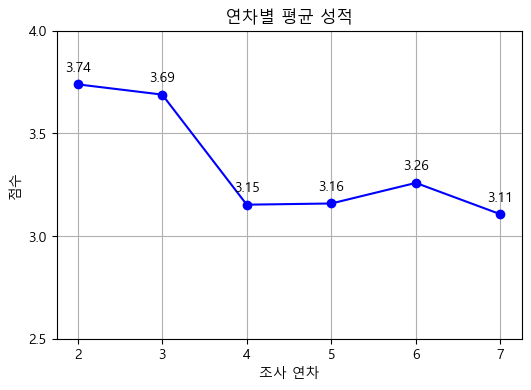

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 연차별 score(성적) 평균값 계산
score_mean_by_wave = df.groupby('WAVE')['score'].mean()

# 그래프 크기 설정
plt.figure(figsize=(6, 4))

# 선 그래프 그리기
plt.plot(score_mean_by_wave.index, 
         score_mean_by_wave.values, marker='o', linestyle='-', color='b')

# 데이터 레이블(소수점 2자리) 추가 (간격 조정)
for x, y in zip(score_mean_by_wave.index, score_mean_by_wave.values):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', va='bottom')

# 그래프 타이틀과 축 라벨 설정
plt.title('연차별 평균 성적')
plt.xlabel('조사 연차')
plt.ylabel('점수')

# 세로축 범위, 틱 값 설정
plt.ylim(2.5, 4.0)
plt.yticks([2.5, 3.0, 3.5, 4.0])

# 그래프 출력
plt.grid(True)
plt.show()

In [43]:
# 다문화 청소년(mc==1)에 대한 데이터 필터링
multicultural_youth = df[df['mc'] == 1]

# 연차별 'score' 평균 계산
score_by_wave = multicultural_youth.groupby('WAVE')['score'].mean()

print(score_by_wave)

WAVE
2    3.484615
3    3.323077
4    2.968421
5    2.645238
6    3.031579
7    2.791176
Name: score, dtype: float64


In [44]:
df.groupby(['WAVE', 'mc'])['score'].mean().unstack()

mc,0.0,1.0
WAVE,,
2,3.741793,3.484615
3,3.693383,3.323077
4,3.154340,2.968421
5,3.164202,2.645238
6,3.260861,3.031579
7,3.109148,2.791176


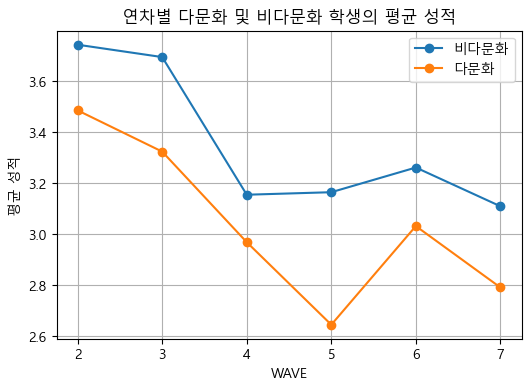

In [45]:
import matplotlib.pyplot as plt

# 그룹화 및 계산 수행
score_by_wave_mc = df.groupby(['WAVE', 'mc'])['score'].mean().unstack()

# 결과 데이터를 선 그래프로 그리기
score_by_wave_mc.plot(kind='line', marker='o', figsize=(6, 4))  # kind='line': 선 그래프
plt.title('연차별 다문화 및 비다문화 학생의 평균 성적')  # 그래프 제목
plt.xlabel('WAVE')  # x축 레이블
plt.ylabel('평균 성적')  # y축 레이블
plt.grid(True)  # 그리드 표시
plt.legend(['비다문화', '다문화'])  # 범례 표시
plt.show()  # 그래프 출력

In [46]:
# 다문화학생(mc==1)만 선택
multicultural_students = df[df['mc'] == 1]

# 연차별로 그룹화하고 크기 계산
count_by_wave = multicultural_students.groupby('WAVE').size()

print(count_by_wave)

WAVE
2    26
3    26
4    19
5    21
6    19
7    17
dtype: int64


In [47]:
# 다문화 학생 수 계산
mc_counts = df[df['mc'] == 1].groupby('WAVE').size()

# 전체 학생 수 계산
total_counts = df.groupby('WAVE').size()

# 비율 계산
mc_ratio = mc_counts / total_counts * 100

# 결과를 데이터프레임으로 조합
mc_summary = pd.DataFrame({'MC_Counts': mc_counts, 'Total_Counts': total_counts, 'MC_Ratio': mc_ratio})

# 결과 출력
print(mc_summary)


      MC_Counts  Total_Counts  MC_Ratio
WAVE                                   
2            26          2012  1.292247
3            26          1983  1.311145
4            19          1851  1.026472
5            21          1820  1.153846
6            19          1842  1.031488
7            17          1695  1.002950


**패널 분석 대상 데이터를 data2010e4.csv 파일로 저장**

In [48]:
df.to_csv("..\Data\KCYPS2010 e4[EXCEL]\data2010e4.csv", index=False)

## 3 패널 회귀분석

### 추정 모형

추정 모형은 다음과 같다.

$$
y_{it} = \beta_0 + \beta_1 m_i + \beta_2 x_{it} + \beta_3 x_{it} m_i + \beta_4 d_t + u_i + e_{it} \tag{1}
$$

여기에서 $i$는 패널에 속한 어떤 개인을 나타내고, $t$는 개인의 특성이 관찰된 어떤 시점을 의미하며, $y_{it}$는 시점 $t$에서 개인 $i$의 학업성적을 나타낸다. 우변 첫 번째 항인 $m_i$는 다문화 더미변수로서 다문화 학생이면 1, 그렇지 않으면 0의 값을 가지며, 시점에 상관없이 동일한 값을 갖는다. 소수이기는 하지만, 주어진 조사기간 중 다문화가정 여부에 대한 응답이 바뀌는 경우도 발견되는데, 다수결 원칙을 사용해 이를 하나의 값으로 통일시켰다. 

$x_{it}$는 학업성적에 영향을 미치는 설명변수로서 가구의 소득 수준이 대표적 예이다. $x_{it}$에 아래첨자 $t$가 붙어 있지만, 남녀 성별 변수와 같은 시간불변(time-invariant) 변수도 설명변수가 될 수 있다. $d_t$는 연도별 특성을 포착하기 위한 시간 더미변수로서, 가령 $d_{2012}$는 연도가 2012년이면 1의 값을 갖고, 그 외에는 0의 값을 갖는다. $u_i$는 개인별 이질성(heterogeneity)을 나타내는 것으로서 확률효과(random effect) 모형에서는 이것을 확률변수로 간주한다. 

KCYPS 데이터의 경우 데이터의 시점($t$)의 개수가 다섯 개(중1 패널) 또는 여섯 개(초1・초4 패널)에 불과한 데 비해, 개인($i$)의 숫자는 이보다 훨씬 많기 때문에 $u_i$를 고정된 값으로 간주하는 고정효과(fixed effect) 모형에 비해 확률효과 모형이 추정에서 더 효율적이라고 판단했다. 또한 위에 제시된 모형에서 가장 중요한 변수인 $m_i$가 시간불변 변수라서 고정효과 모형을 사용할 경우 $m_i$의 계수를 추정할 수 없다는 문제도 있다.

위 모형에서 다문화 더미변수 $m_i$의 계수인 $\beta_1$은 본 연구에서 가장 중요한 계수로서 만약 이것이 플러스(마이너스) 부호이면, 다른 조건($x_{it}$ 및 $d_t$)이 동일할 때 다문화 학생의 학업성적이 비다문화 학생에 비해 더 높은(낮은) 경향이 있다는 것을 의미한다. 한 가지 유의할 것은 $\beta_1$의 크기가 두 그룹 학업성적의 평균적인 차이는 아니라는 점이다. 이는 위 식의 우변에 상호작용항($x_{it} m_i$)이 들어 있기 때문이다. 따라서 다른 조건이 동일한 상태에서 $m_i$가 0일 때와 1일 때의 평균적인 차이는 $\beta_1$에다 $\beta_3 x_{it}$를 더한 값이다.

위 식 1에서 상호작용항 $x_{it} m_i$는 설명변수 $x_{it}$가 학업성적에 영향을 미치는 효과에 있어서 다문화 학생과 비다문화 학생 간에 어떤 차이가 있는지를 포착하는 역할을 한다. 다른 조건이 동일할 때, $x_{it}$가 학업성적 $y_{it}$에 미치는 평균적인 효과는 비다문화 학생의 경우에는 $\beta_2$이지만, 다문화 학생의 경우에는 그것에다 상호작용항의 계수를 더한 $\beta_2 + \beta_3$가 된다. 따라서 상호작용항의 계수 $\beta_3$만큼 다문화 학생과 비다문화 학생 간에 소위 한계효과(marginal effect)의 차이가 있는 것이다.


### 초4 패널 추정 작업

**data2010e4.csv 불러오기**

In [49]:
import pandas as pd

df = pd.read_csv('..\Data\KCYPS2010 e4[EXCEL]\data2010e4.csv') 
df

,ID,WAVE,WEIGHT1,score,mc,male,income,fa_edu,mo_edu,par_satis,...,abuse,sch_study,friend,teacher,wave2,wave3,wave4,wave5,wave6,wave7
0,15202,2,418.658591,3.4,0.0,0.0,3.6,2.0,2.0,3.0,...,1.25,3.333333,3.2,3.25,1,0,0,0,0,0
1,15203,2,428.976115,5.0,0.0,1.0,5.0,4.0,4.0,3.0,...,2.00,4.000000,3.4,4.00,1,0,0,0,0,0
2,15204,2,418.658591,3.0,0.0,0.0,5.0,4.0,4.0,3.0,...,1.50,3.333333,2.8,3.00,1,0,0,0,0,0
3,15205,2,428.976115,3.8,0.0,1.0,10.0,4.0,4.0,3.0,...,1.00,3.333333,2.6,3.00,1,0,0,0,0,0
4,15206,2,418.658591,3.6,0.0,0.0,3.6,4.0,2.0,3.0,...,1.50,3.666667,3.2,3.00,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11198,168511,7,119.183870,4.6,0.0,0.0,6.5,4.0,4.0,4.0,...,1.50,3.333333,3.2,2.75,0,0,0,0,0,1
11199,168515,7,119.183870,2.4,0.0,0.0,4.5,5.0,4.0,4.0,...,1.00,2.333333,2.6,3.00,0,0,0,0,0,1
11200,168518,7,127.617004,2.2,0.0,1.0,5.0,3.0,4.0,4.0,...,1.25,3.000000,3.0,3.00,0,0,0,0,0,1
11201,168531,7,119.183870,4.0,0.0,0.0,4.0,3.0,3.0,4.0,...,1.00,2.666667,3.2,3.00,0,0,0,0,0,1


**`linearmodels` 패키지 설치**

In [50]:
# %pip install linearmodels # 처음에 한 번만 설치

### 통합(pooled) OLS 모형

In [51]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# ID와 WAVE를 인덱스로 설정
data = df.set_index(['ID', 'WAVE'])

# 상호작용 항
data['male*mc'] = data['male'] * data['mc']
data['income*mc'] = data['income'] * data['mc']
data['fa_edu*mc'] = data['fa_edu'] * data['mc']
data['mo_edu*mc'] = data['mo_edu'] * data['mc']
data['par_satis*mc'] = data['par_satis'] * data['mc']

data['health*mc'] = data['health'] * data['mc']
data['aft_sch*mc'] = data['aft_sch'] * data['mc']
data['aft_sch1*mc'] = data['aft_sch1'] * data['mc']

data['care*mc'] = data['care'] * data['mc']
data['abuse*mc'] = data['abuse'] * data['mc']
data['sch_study*mc'] = data['sch_study'] * data['mc']
data['friend*mc'] = data['friend'] * data['mc']
data['teacher*mc'] = data['teacher'] * data['mc']

# X 변수(상수항, 시간 더미 및 상호작용 항)
X_with_const = add_constant(
    data[['mc',
          'male', 'income', 'fa_edu', 'mo_edu', 'par_satis',
          'health', 'aft_sch', 'aft_sch1', 'care', 'abuse',
          'sch_study', 'friend', 'teacher',
          'male*mc', 'income*mc', 'fa_edu*mc', 'mo_edu*mc', 'par_satis*mc',
          'health*mc', 'aft_sch*mc', 'aft_sch1*mc', 'care*mc', 'abuse*mc',
          'sch_study*mc', 'friend*mc', 'teacher*mc',
          'wave3', 'wave4', 'wave5', 'wave6', 'wave7']]
)

# Pooled OLS 모델을 사용하여 회귀 모델을 실행
mod = PooledOLS(data['score'], X_with_const)
pooled_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(pooled_results)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  score   R-squared:                        0.3519
Estimator:                  PooledOLS   R-squared (Between):              0.4655
No. Observations:               11203   R-squared (Within):               0.2225
Date:                Sat, Jan 04 2025   R-squared (Overall):              0.3519
Time:                        09:31:26   Log-likelihood                -1.196e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      189.57
Entities:                        2165   P-value                           0.0000
Avg Obs:                       5.1746   Distribution:                F(32,11170)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             155.69
                            

### 고정효과 모형

In [52]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# ID와 WAVE를 인덱스로 설정
data = df.set_index(['ID', 'WAVE'])

# 상호작용 항
data['male*mc'] = data['male'] * data['mc']
data['income*mc'] = data['income'] * data['mc']
data['fa_edu*mc'] = data['fa_edu'] * data['mc']
data['mo_edu*mc'] = data['mo_edu'] * data['mc']
data['par_satis*mc'] = data['par_satis'] * data['mc']

data['health*mc'] = data['health'] * data['mc']
data['aft_sch*mc'] = data['aft_sch'] * data['mc']
data['aft_sch1*mc'] = data['aft_sch1'] * data['mc']

data['care*mc'] = data['care'] * data['mc']
data['abuse*mc'] = data['abuse'] * data['mc']
data['sch_study*mc'] = data['sch_study'] * data['mc']
data['friend*mc'] = data['friend'] * data['mc']
data['teacher*mc'] = data['teacher'] * data['mc']

# X 변수(상수항, 시간 더미 및 상호작용 항)
X_with_const = add_constant(
    data[['mc',
          'male', 'income', 'fa_edu', 'mo_edu', 'par_satis',
          'health', 'aft_sch', 'aft_sch1', 'care', 'abuse',
          'sch_study', 'friend', 'teacher',
          'male*mc', 'income*mc', 'fa_edu*mc', 'mo_edu*mc', 'par_satis*mc',
          'health*mc', 'aft_sch*mc', 'aft_sch1*mc', 'care*mc', 'abuse*mc',
          'sch_study*mc', 'friend*mc', 'teacher*mc',
          'wave3', 'wave4', 'wave5', 'wave6', 'wave7']]
)

# 고정효과 모델을 사용하여 회귀 모델을 실행
mod = PanelOLS(data['score'], X_with_const, 
               drop_absorbed=True, entity_effects=True)
fe_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(fe_results)

C:\Users\pilsu\AppData\Local\Temp\ipykernel_19868\2752589321.py:40: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

mc, male, fa_edu, mo_edu, male*mc, fa_edu*mc, mo_edu*mc

  fe_results = mod.fit(cov_type='clustered', cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:                  score   R-squared:                        0.2688
Estimator:                   PanelOLS   R-squared (Between):              0.2805
No. Observations:               11203   R-squared (Within):               0.2688
Date:                Sat, Jan 04 2025   R-squared (Overall):              0.2748
Time:                        09:31:26   Log-likelihood                   -8221.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      132.51
Entities:                        2165   P-value                           0.0000
Avg Obs:                       5.1746   Distribution:                 F(25,9013)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             114.99
                            

- **AbsorbingEffectWarning 이유:(ChatGPT 설명)** 이 경고는 모델에서 특정 변수가 완전히 흡수되어 회귀에서 제거되었다고 알리는 것입니다. 'male' 변수가 여기에 해당됩니다. 이는 'male' 변수가 데이터 내 다른 변수와 완벽하게 상관되어 있거나, 모델의 고정 효과나 더미 변수와 완벽하게 상관되어 있어서, 이 변수의 효과를 모델이 구분할 수 없다는 의미입니다. 이런 경우 변수가 회귀에서 어떠한 추가적인 설명력도 제공하지 못하므로 모델에서 제외됩니다.

### 확률효과 모형

In [53]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# ID와 WAVE를 인덱스로 설정
data = df.set_index(['ID', 'WAVE'])

# 상호작용 항
data['male*mc'] = data['male'] * data['mc']
data['income*mc'] = data['income'] * data['mc']
data['fa_edu*mc'] = data['fa_edu'] * data['mc']
data['mo_edu*mc'] = data['mo_edu'] * data['mc']
data['par_satis*mc'] = data['par_satis'] * data['mc']

data['health*mc'] = data['health'] * data['mc']
data['aft_sch*mc'] = data['aft_sch'] * data['mc']
data['aft_sch1*mc'] = data['aft_sch1'] * data['mc']

data['care*mc'] = data['care'] * data['mc']
data['abuse*mc'] = data['abuse'] * data['mc']
data['sch_study*mc'] = data['sch_study'] * data['mc']
data['friend*mc'] = data['friend'] * data['mc']
data['teacher*mc'] = data['teacher'] * data['mc']

# X 변수(상수항, 시간 더미 및 상호작용 항)
X_with_const = add_constant(
    data[['mc',
          'male', 'income', 'fa_edu', 'mo_edu', 'par_satis',
          'health', 'aft_sch', 'aft_sch1', 'care', 'abuse',
          'sch_study', 'friend', 'teacher',
          'male*mc', 'income*mc', 'fa_edu*mc', 'mo_edu*mc', 'par_satis*mc',
          'health*mc', 'aft_sch*mc', 'aft_sch1*mc', 'care*mc', 'abuse*mc',
          'sch_study*mc', 'friend*mc', 'teacher*mc',
          'wave3', 'wave4', 'wave5', 'wave6', 'wave7']]
)

# 확률효과 모델을 사용하여 회귀 모델을 실행
mod = RandomEffects(data['score'], X_with_const)
results = mod.fit()

# 결과 요약을 출력
print(results)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  score   R-squared:                        0.3367
Estimator:              RandomEffects   R-squared (Between):              0.4158
No. Observations:               11203   R-squared (Within):               0.2592
Date:                Sat, Jan 04 2025   R-squared (Overall):              0.3391
Time:                        09:31:27   Log-likelihood                   -9678.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      177.20
Entities:                        2165   P-value                           0.0000
Avg Obs:                       5.1746   Distribution:                F(32,11170)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             148.57
                            

<br></br>

## 부록: Stata 및 R의 추정 결과 

### (1) Stata

**명령문**

    * 데이터 불러오기
    import delimited "C:/1.1 다문화/Data/KCYPS2010 e4[EXCEL]/data2010e4.csv", clear

    * 상호작용항 
    gen male_mc = male * mc
    gen income_mc = income * mc
    gen fa_edu_mc = fa_edu * mc
    gen mo_edu_mc = mo_edu * mc
    gen par_satis_mc = par_satis * mc
    gen health_mc = health * mc
    gen aft_sch_mc = aft_sch * mc
    gen aft_sch1_mc = aft_sch1 * mc
    gen care_mc = care * mc
    gen abuse_mc = abuse * mc
    gen sch_study_mc = sch_study * mc
    gen friend_mc = friend * mc
    gen teacher_mc = teacher * mc

    * 패널 변수 설정
    xtset id wave

    * 확률효과 모델
    xtreg score mc male income fa_edu mo_edu par_satis health aft_sch aft_sch1 care abuse    sch_study friend teacher male_mc income_mc fa_edu_mc mo_edu_mc par_satis_mc health_mc     aft_sch_mc aft_sch1_mc care_mc abuse_mc sch_study_mc friend_mc teacher_mc wave3 wave4 wave5 wave6 wave7, re

**추정 결과**

    Random-effects GLS regression                   Number of obs     =     11,203
    Group variable: id                              Number of groups  =      2,165

    R-sq:                                           Obs per group:
         within  = 0.2619                                         min =          1
         between = 0.4439                                         avg =        5.2
         overall = 0.3431                                         max =          6

                                                    Wald chi2(32)     =    4753.66
    corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

    ------------------------------------------------------------------------------
           score |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
              mc |  -1.496387   .8052801    -1.86   0.063    -3.074707    .0819329
            male |   .0355497   .0205411     1.73   0.084      -.00471    .0758095
          income |   .0129146    .003358     3.85   0.000     .0063331    .0194962
          fa_edu |   .0751768   .0139928     5.37   0.000     .0477515    .1026022
          mo_edu |   .0499935   .0148884     3.36   0.001     .0208127    .0791743
       par_satis |   .0345744   .0132126     2.62   0.009     .0086783    .0604705
          health |   .0255886   .0117114     2.18   0.029     .0026347    .0485426
         aft_sch |    .055482   .0061919     8.96   0.000     .0433462    .0676179
        aft_sch1 |   .0535757   .0196912     2.72   0.007     .0149816    .0921697
            care |   .0658567   .0132468     4.97   0.000     .0398935    .0918199
           abuse |  -.0358388   .0110823    -3.23   0.001    -.0575596    -.014118
       sch_study |   .4058489   .0132699    30.58   0.000     .3798405    .4318574
          friend |    .115849   .0188975     6.13   0.000     .0788106    .1528874
         teacher |   .0111298   .0121972     0.91   0.362    -.0127763    .0350359
         male_mc |   .3134432   .2040747     1.54   0.125    -.0865359    .7134223
       income_mc |   .0271346   .0453492     0.60   0.550    -.0617483    .1160175
       fa_edu_mc |   .0247642   .1155191     0.21   0.830    -.2016492    .2511776
       mo_edu_mc |  -.0713213   .1227051    -0.58   0.561    -.3118188    .1691762
    par_satis_mc |   .1175728   .1162885     1.01   0.312    -.1103485    .3454941
       health_mc |   .1362609   .1260625     1.08   0.280     -.110817    .3833388
      aft_sch_mc |   .0522046   .0610389     0.86   0.392    -.0674294    .1718387
     aft_sch1_mc |  -.0270774   .1436628    -0.19   0.851    -.3086513    .2544965
         care_mc |   .0084355   .1124282     0.08   0.940    -.2119196    .2287907
        abuse_mc |   .1159818    .117991     0.98   0.326    -.1152763      .34724
    sch_study_mc |   .3428592   .1328674     2.58   0.010     .0824439    .6032744
       friend_mc |  -.2226195   .1785316    -1.25   0.212    -.5725351     .127296
      teacher_mc |  -.0442967    .114426    -0.39   0.699    -.2685676    .1799743
           wave3 |  -.0344588   .0184558    -1.87   0.062    -.0706315    .0017139
           wave4 |  -.5361757   .0190425   -28.16   0.000    -.5734984    -.498853
           wave5 |  -.5135004    .019341   -26.55   0.000    -.5514081   -.4755928
           wave6 |  -.4296172   .0194068   -22.14   0.000    -.4676539   -.3915805
           wave7 |  -.5874373    .020146   -29.16   0.000    -.6269227   -.5479518
           _cons |   1.207059   .0869396    13.88   0.000      1.03666    1.377457
    -------------+----------------------------------------------------------------
         sigma_u |  .38155536
         sigma_e |  .56196381
             rho |  .31553606   (fraction of variance due to u_i)
    ------------------------------------------------------------------------------

### (2) R

**명령문**

    # 참고자료: R Tutorial: Panel Data Analysis 1

    # 데이터 불러오기
    file_path <- "C:/1.1 다문화/Data/KCYPS2010 e4[EXCEL]/data2010e4.csv"
    data <- read.csv(file_path, encoding = "UTF-8")

    library(plm)

    # 상호작용항 
    male.mc <- data$male * data$mc
    income.mc <- data$income * data$mc
    fa_edu.mc <- data$fa_edu * data$mc
    mo_edu.mc <- data$mo_edu * data$mc
    par_satis.mc <- data$par_satis * data$mc
    health.mc <- data$health * data$mc
    aft_sch.mc <- data$aft_sch * data$mc
    aft_sch1.mc <- data$aft_sch1 * data$mc
    care.mc <- data$care * data$mc
    abuse.mc <- data$abuse * data$mc
    sch_study.mc <- data$sch_study * data$mc
    friend.mc <- data$friend * data$mc
    teacher.mc <- data$teacher * data$mc

    # 확률효과 모델
    re_model <- plm(score ~ mc
                + male + income + fa_edu + mo_edu + par_satis 
                + health + aft_sch + aft_sch1 + care + abuse 
                + sch_study + friend + teacher
                + male.mc + income.mc + fa_edu.mc + mo_edu.mc + par_satis.mc 
                + health.mc + aft_sch.mc + aft_sch1.mc + care.mc + abuse.mc 
                + sch_study.mc + friend.mc + teacher.mc 
                + wave3 + wave4 + wave5 + wave6 + wave7,
                data = data,
                index = c("ID", "WAVE"),
                effect = "individual", model = "random")
    summary(re_model)

**추정 결과**

    Oneway (individual) effect Random Effect Model 
       (Swamy-Arora's transformation)

    Call:
    plm(formula = score ~ mc + male + income + fa_edu + mo_edu + 
        par_satis + health + aft_sch + aft_sch1 + care + abuse + 
        sch_study + friend + teacher + male.mc + income.mc + fa_edu.mc + 
        mo_edu.mc + par_satis.mc + health.mc + aft_sch.mc + aft_sch1.mc + 
        care.mc + abuse.mc + sch_study.mc + friend.mc + teacher.mc + 
        wave3 + wave4 + wave5 + wave6 + wave7, data = data, effect = "individual", 
        model = "random", index = c("ID", "WAVE"))

    Unbalanced Panel: n = 2165, T = 1-6, N = 11203

    Effects:
                     var std.dev share
    idiosyncratic 0.3161  0.5622 0.678
    individual    0.1502  0.3875 0.322
    theta:
       Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     0.1767  0.4558  0.4904  0.4710  0.4904  0.4904 

    Residuals:
        Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    -2.59919 -0.36092  0.00190  0.00145  0.36011  2.27130 

    Coefficients:
                   Estimate Std. Error  z-value  Pr(>|z|)    
    (Intercept)   1.1979393  0.0865807  13.8361 < 2.2e-16 ***
    mc           -0.1239194  0.0926942  -1.3369  0.181267    
    male          0.0374660  0.0206023   1.8185  0.068982 .  
    income        0.0131764  0.0033566   3.9256 8.653e-05 ***
    fa_edu        0.0767399  0.0139917   5.4847 4.142e-08 ***
    mo_edu        0.0480199  0.0148959   3.2237  0.001265 ** 
    par_satis     0.0364404  0.0131151   2.7785  0.005461 ** 
    health        0.0267369  0.0116609   2.2929  0.021856 *  
    aft_sch       0.0556308  0.0061566   9.0360 < 2.2e-16 ***
    aft_sch1      0.0534320  0.0195093   2.7388  0.006166 ** 
    care          0.0663098  0.0131548   5.0407 4.638e-07 ***
    abuse        -0.0349042  0.0110366  -3.1626  0.001564 ** 
    sch_study     0.4073023  0.0131982  30.8603 < 2.2e-16 ***
    friend        0.1123815  0.0187948   5.9794 2.240e-09 ***
    teacher       0.0114165  0.0121226   0.9417  0.346322    
    male.mc       0.1855148  0.1285274   1.4434  0.148911    
    income.mc     0.0211049  0.0325528   0.6483  0.516772    
    fa_edu.mc    -0.0204435  0.0703883  -0.2904  0.771481    
    mo_edu.mc     0.0459941  0.0755749   0.6086  0.542797    
    par_satis.mc  0.0578572  0.1013236   0.5710  0.567990    
    health.mc    -0.0941496  0.1061463  -0.8870  0.375090    
    aft_sch.mc    0.0382074  0.0602189   0.6345  0.525771    
    aft_sch1.mc  -0.0141860  0.1423909  -0.0996  0.920640    
    care.mc      -0.1337953  0.1007345  -1.3282  0.184113    
    abuse.mc      0.1375030  0.0940490   1.4620  0.143731    
    sch_study.mc  0.1260121  0.1141817   1.1036  0.269762    
    friend.mc    -0.0403847  0.1494436  -0.2702  0.786980    
    teacher.mc   -0.0648715  0.1111799  -0.5835  0.559568    
    wave3        -0.0344796  0.0184223  -1.8716  0.061259 .  
    wave4        -0.5359384  0.0190129 -28.1882 < 2.2e-16 ***
    wave5        -0.5140416  0.0193094 -26.6214 < 2.2e-16 ***
    wave6        -0.4303938  0.0193786 -22.2097 < 2.2e-16 ***
    wave7        -0.5874333  0.0201294 -29.1828 < 2.2e-16 ***
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Total Sum of Squares:    5537.4
    Residual Sum of Squares: 3676.4
    R-Squared:      0.33616
    Adj. R-Squared: 0.33425
    Chisq: 4729.48 on 32 DF, p-value: < 2.22e-16